# Sieci neuronowe - wstęp

In [46]:
!pip install matplotlib numpy scikit-learn

In [47]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [48]:
data = np.loadtxt('regression_data.txt', delimiter=',')
Y = data[:, 0]
X = np.array([(x-32)*5/9 for x in data[:, 1]])

In [49]:
print(data)

[[20.         88.59999847]
 [16.         71.59999847]
 [19.79999924 93.30000305]
 [18.39999962 84.30000305]
 [17.10000038 80.59999847]
 [15.5        75.19999695]
 [14.69999981 69.69999695]
 [17.10000038 82.        ]
 [15.39999962 69.40000153]
 [16.20000076 83.30000305]
 [15.         79.59999847]
 [17.20000076 82.59999847]
 [16.         80.59999847]
 [17.         83.5       ]
 [14.39999962 76.30000305]]


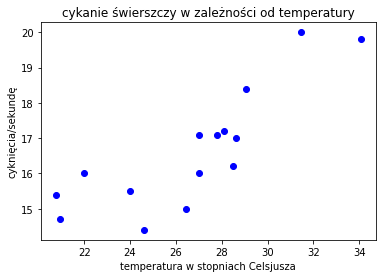

In [50]:
plt.scatter(X, Y, marker='o', c='b')
plt.title('cykanie świerszczy w zależności od temperatury')
plt.ylabel('cyknięcia/sekundę')
plt.xlabel('temperatura w stopniach Celsjusza')
plt.show()

In [51]:
samples_cnt = len(X)
weight0 = 10.0 # inicjalizacja wag
weight1 = 10.0 #
learning_rate = 0.001 # rozmiar stałej uczenia
maxIteration = 1000 # liczba iteracji

In [52]:
X

array([31.44444359, 21.99999915, 34.05555725, 29.05555725, 26.99999915,
       23.99999831, 20.94444275, 27.77777778, 20.77777863, 28.50000169,
       26.44444359, 28.11111026, 26.99999915, 28.61111111, 24.61111281])

In [53]:
Y

array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
       15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
       15.        , 17.20000076, 16.        , 17.        , 14.39999962])

**Zadanie 1: uzupełnij listę wartości tak, aby dla każdej temperatury wyznaczyć liczbę cyknięć świerszczy przy użyciu aktualnych wag modelu liniowego**

In [54]:
predicted_values = weight0 * X + weight1
predicted_values

array([324.44443594, 229.9999915 , 350.5555725 , 300.5555725 ,
       279.9999915 , 249.99998306, 219.4444275 , 287.77777778,
       217.77778628, 295.00001694, 274.44443594, 291.11110261,
       279.9999915 , 296.11111111, 256.11112806])

**Zadanie 2: napisz kod, który iteracyjnie będzie poprawiać wagi, by wyznaczyły model najlepiej odwzorowujący zależność liczby cyknięć od temperatury**

In [55]:
a_list = []
b_list = []
y_list = []
p_list = []
for i in range(maxIteration):
    #Zadanie1:
    predicted_values = weight0 + weight1 * X

    #Zadanie2:
    weight0 -= learning_rate * (-2 * np.mean(Y - predicted_values))
    weight1 -= learning_rate * (-2 * np.mean((Y - predicted_values) * X))

    # dodanie wartości do list w celu późniejszej wizualizacji, nie modyfikować!
    a_list.append(weight1)
    b_list.append(weight0)
    y_list.append(mean_squared_error(Y, predicted_values))
    p_list.append(predicted_values)

### Zobaczmy jak wyglądała aktualizacja wag i jak dopasowywała się ostateczna prosta

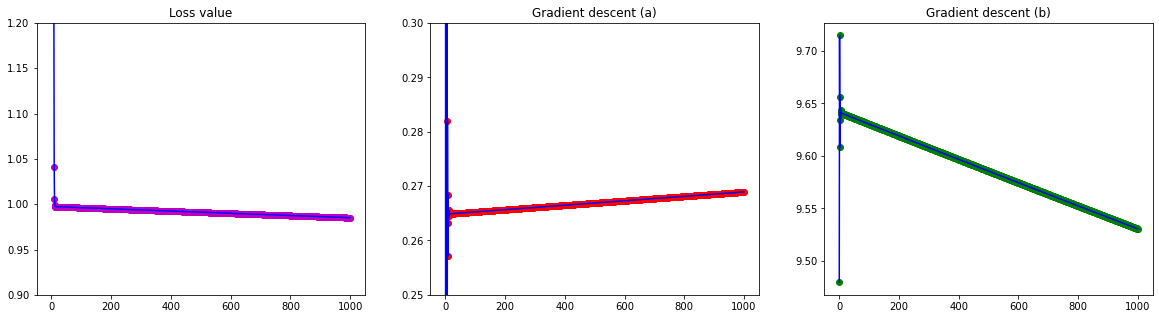

Computed weights values -> w0: 9.530626446374514 w1: 0.26892387326253875


In [56]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.ylim(.9, 1.2)
plt.scatter(range(maxIteration),y_list,c="m")
plt.plot(range(maxIteration),y_list,c="b")
plt.title("Loss value")

plt.subplot(1,3,2)
plt.ylim(.25, .3)
plt.scatter(range(maxIteration),a_list,c="r")
plt.plot(range(maxIteration),a_list,c="b")
plt.title("Gradient descent (a)")

plt.subplot(1,3,3)
plt.scatter(range(maxIteration),b_list,c="g")
plt.plot(range(maxIteration),b_list,c="b")
plt.title("Gradient descent (b)")

plt.show()
print("Computed weights values -> w0:", weight0, "w1:", weight1)

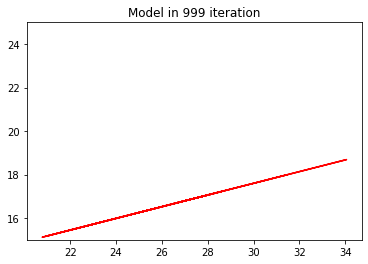

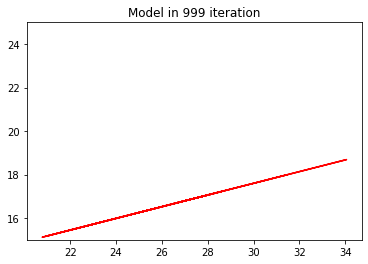

In [57]:
from IPython import display
for i in range(maxIteration):
    plt.clf()
    plt.plot(X, p_list[i],"r-")
    plt.title(f"Model in {i} iteration")
    plt.ylim(15, 25)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Zadanie 3. Po przeczytaniu dokumentacji biblioteki scikit-learn stwórz klasyfikatory regresji logistycznej (Logistic Regression) oraz MLP (Multi-Layer Perceptron), naucz je na podstawie zbioru digits i użyj do rozpoznawania cyfr w zbiorze  testowym, etykiety umieść w zmiennych predicted_logreg i predicted_mlp. Spróbuj pomodyfikować parametry obu klasyfikatorów i zobacz czy można doprowadzić do sytuacji, gdy jeden będzie działał zdecydowanie lepiej od drugiego**

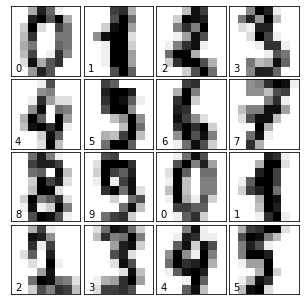

In [60]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

#%matplotlib inline
digits = load_digits() #zbiór zawiera 1797 obrazków reprezentujących cyfry od 0 do 9
fig = plt.figure(figsize = (4,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#wyświetlanie 16 obrazków z ich etykietami
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

# deklaracja
mlp = MLPClassifier()
logreg = LogisticRegression()

# uczenie
mlp.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# prognoza
predicted_logreg = logreg.predict(X_test)
predicted_mlp = mlp.predict(X_test)

[[33  0  1  0  0  1  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  2 33  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  1 29  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  1  0 41  1  0]
 [ 0  1  0  0  0  2  0  1 32  0]
 [ 0  0  0  0  0  0  0  0  1 34]]
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 28  0  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  1  0  0  0  0  0 42  0  1]
 [ 0  1  0  1  0  0  0  1 33  0]
 [ 0  0  0  1  0  0  0  0  0 34]]


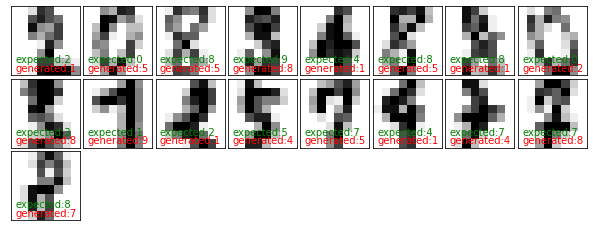

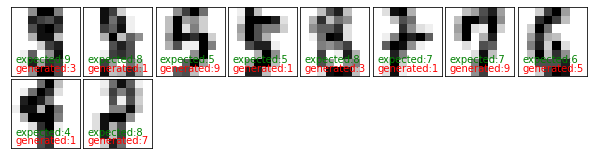

In [61]:
if predicted_logreg is not None:
    print(confusion_matrix(y_test,predicted_logreg))
    expected = y_test
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):
        if predicted_logreg[i] != expected[i]:
            ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            ax.text(0, 7, "generated:" + str(predicted_logreg[i]), color='red')
            ax.text(0, 6, "expected:" + str(expected[i]), color='green')

    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):
        if predicted_mlp[i] != expected[i]:
            bx = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            bx.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            bx.text(0, 7, "generated:" + str(predicted_mlp[i]), color='red')
            bx.text(0, 6, "expected:" + str(expected[i]), color='green')
    print(confusion_matrix(y_test,predicted_mlp))

### Zobaczmy na które fragmenty klasyfikator LogisticRegression zwraca uwagę

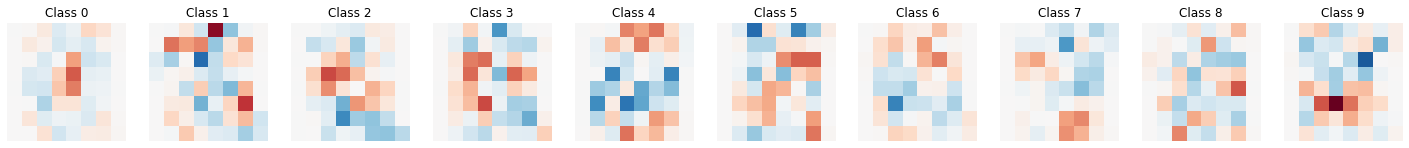

In [62]:
scale = np.max(np.abs(logreg.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(logreg.coef_[i].reshape(8, 8),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

### Tensorflow Playground. Zajrzyj na stronę [playground.tensorflow.org](http://playground.tensorflow.org).

**Zadanie 4. Ustaw minimalną sieć o zerowej liczbie warstw ukrytych (0 hidden layers; nie zmieniaj kolumny features) i naucz ją na problemie nr 3 (dwie grupy) - spójrz na wizualizację i wykres błędu treningowego i testowego - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? Zmień problem na pierwszy i naucz sieć jeszcze raz - na czym polega różnica i dlaczego? Jak sprawić by efekt znów był zadowalający?**

Problem nr 3:
- Zadanie jest tutaj stosunkowo proste, gdy wymaga ono wyznaczenia prostej między dwoma grupami, stąd granica decyzyjna będzie optymalna.

Problem nr 1:
- Tutaj wyznaczenie jednej prostej nie rozwiąze problemu, gdyz dane sa oddzielone nieliniowo.

Rozwiązanie problemu 1:
- Wymagać ono będzie dodania warstw ukrytych
- Tez problem bedzie wymagal dosc nieliniowych rozwiazan, wiec pomoc moze wyznaczenie innego aktywatora (nieliniowego, np. Tanh)

Mi wyszło przy 1 ukrytej wartstwie przy 4 neuronach Tanh

**Zadanie 5. Spróbuj przeuczyć sieć w środowisku tensorflow playground. Wyjaśnij jak do tego doprowadzić i po czym rozpoznać jej przeuczenie.**

Udało mi się przeuczyć model przy dodaniu 4-6 warstw oraz po 8 neuronów w kazdej. Aktywator Tanh albo ReLu oraz duy stosunek danych treningowych do testowych (90-10).

Granica decyzyjna jest poszarpana, nieregularna, a wyniki straty testu i treningu wynosi 0.000. To są wskazówki, które pokazują przeuczenie sieci.

Idealnie to widać kiedy dodamy "Szum" do danych, wtedy model separuje szum od odpowiednich punktów.